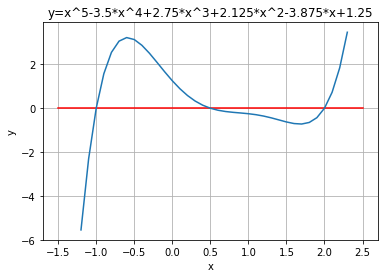

In [51]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-1.2, 2.4, 0.1)
y = x**5-3.5*x**4+2.75*x**3+2.125*x**2-3.875*x+1.25
plt.title("y=x^5-3.5*x^4+2.75*x^3+2.125*x^2-3.875*x+1.25")
plt.plot([-1.5,2.5],[0,0],color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.plot(x, y)
plt.show()

In [50]:
#递归求根(pyhon3.6)
import numpy as np
import math
from scipy.linalg import solve
def getBorC(a,r,s):    #获得b或c方程参数数组
    n = len(a) - 1
    b = [0]*(n+1)
    b[n] = a[n]
    b[n-1] = a[n-1] + r*b[n-1+1]
    for i in range(n-1):
        b[n-2-i] = a[n-2-i]+r*b[n-2-i+1]+s*b[n-2-i+2]
    return b
def Rootseeking(a,r,s):
    n = len(a)-1  #n为最高阶数
    if n==0:    #所有的根已经求完
        return
    if n==1:    #还剩一阶
        r = a[n]
        s = a[n-1]
        finalRoot = -(s/r)    #还剩一阶的情况，直接求根
        print('一个实根是：' + str(finalRoot))
        return
    r_mistake = 1   #给误差Δr一个初始值
    s_mistake = 1   #Δs的误差Δs一个初始值
    while r_mistake>0.01 or s_mistake>0.01:   #直到Δr的误差、Δs的误差小于规定值，即修正的x^2-r*x-s的解是方程的一组根
        b = getBorC(a,r,s)   #获得b
        c = getBorC(b,r,s)   #获得c
        x = np.array([[c[2],c[3]],[c[1],c[2]]])   #二元一次方程参数矩阵
        y = np.array([-b[1],-b[0]])    #二元一次方程值矩阵
        r_ , s_ = solve(x,y)   #解二元一次方程得到Δr、Δs
        r = r_new = r_ + r   #修正r
        s = s_new = s_ + s   #修正s
        r_mistake = abs(r_/r_new)
        s_mistake = abs(s_/s_new)
    if r**2+4*s >= 0:
        print('一个实根是：' + str((r_new+math.sqrt(r_new**2+4*s_new))/2))
        print('一个实根是：' + str((r_new-math.sqrt(r_new**2+4*s_new))/2))
    else:
        print('一个虚根是：' + str((r_new)/2)+ ' + ' + str(math.sqrt(-4*s_new-r_new**2)/2) + ' j')
        print('一个虚根是：' + str((r_new)/2)+ ' - ' + str(math.sqrt(-4*s_new-r_new**2)/2) + ' j')
    a=[0]*(n-2+1) 
    for i in range(len(a)):
        a[len(a)-1-i] = b[n-i]
    Rootseeking(a,r,s)
if __name__ =='__main__':
    r=s=-1 #初始r、s为-1
    a = [1.25,-3.875,2.125,2.75,-3.5,1]   #求解方程 x^5-3.5*x^4+2.75*x^3+2.125*x^2-3.875*x+1.25
    Rootseeking(a,r,s) #递归求根

一个实根是：0.4999999713200723
一个实根是：-1.0000000365845982
一个虚根是：1.000025501548532 + 0.4993116076613512 j
一个虚根是：1.000025501548532 - 0.4993116076613512 j
一个实根是：2.0070876965286377
